네이버 쇼핑에서 책상 검색
-> 가격비교
-> 이름, 가격, 리뷰수

In [144]:
import requests as req
import pandas as pd
from bs4 import BeautifulSoup as bs

In [76]:
url = 'https://search.shopping.naver.com/search/all.nhn?origQuery=%EC%B1%85%EC%83%81&pagingIndex=1&pagingSize=40&productSet=model&viewType=thumb&sort=rel&frm=NVSHMDL&query=%EC%B1%85%EC%83%81'
res = req.get(url)
soup = bs(res.content,'html.parser')

In [77]:
pName = soup.select('div a.tit') #60개인데 가져오면 40개
pPrice = soup.select('span.num._price_reload')
pReview = soup.select('span a.graph em')

In [78]:
for i in range(40) :
    print("제품명: "+pName[i].text.strip())
    print("가격: "+pPrice[i].text.strip())
    print("리뷰수: "+pReview[i].text.strip())
    print("-"*40)

제품명: 이지심플 100 컴퓨터책상
가격: 24,080
리뷰수: 1,778
----------------------------------------
제품명: 원목 컴퓨터책상 2인용
가격: 98,000
리뷰수: 2,942
----------------------------------------
제품명: 이지심플 우드 기본형 책상 80
가격: 24,000
리뷰수: 4,340
----------------------------------------
제품명: 위드제이 컴퓨터 책상
가격: 29,500
리뷰수: 5,729
----------------------------------------
제품명: 더준 컴퓨터책상
가격: 28,500
리뷰수: 1,968
----------------------------------------
제품명: 모노 일자형 책상
가격: 41,890
리뷰수: 30
----------------------------------------
제품명: 에반스 2000 전면책상세트 V2
가격: 85,470
리뷰수: 10
----------------------------------------
제품명: 1인용 2인용 컴퓨터책상 1200
가격: 57,600
리뷰수: 2,958
----------------------------------------
제품명: 컴퓨터 철제 책상 2인용 1500
가격: 60,000
리뷰수: 424
----------------------------------------
제품명: ARENA DESK 1200 게이밍 1인용 컴퓨터책상
가격: 246,380
리뷰수: 1,322
----------------------------------------
제품명: 오던 원목 책상 1200
가격: 97,000
리뷰수: 196
----------------------------------------
제품명: 브로디 전면 책상
가격: 54,500
리뷰수: 8
----------------------------------------
제품명: 컴퓨터 

In [128]:
len(pName), len(pPrice), len(pReview)

(40, 40, 40)

In [129]:
url = 'https://search.shopping.naver.com/search/all.nhn?origQuery=%EC%B1%85%EC%83%81&pagingIndex=1&pagingSize=40&productSet=model&viewType=list&sort=rel&frm=NVSHMDL&query=%EC%B1%85%EC%83%81'
res = req.get(url)
soup = bs(res.content,'html.parser')

In [130]:
pName = soup.select('div.info a.tit') #60개인데 가져오면 40개
pPrice = soup.select('span.num._price_reload')
pReview = soup.select('div span.star_graph + em') #div span.star_graph + em = span a.graph em , .etc
check = soup.select('span + span.etc')

In [137]:
#
name = []
price = []
review = []
cnt = 0

for ch in check :
    if '별점' in ch.text.strip():
        name.append(pName[cnt].text.strip())
        price.append(pPrice[cnt].text)
        review.append(pReview[cnt].text)
    else : #가격 = 0
        name.append(pName[cnt].text)
        price.append(pPrice[cnt].text)
        pReview.insert(cnt, '0') # 빈칸이면 0을 집어 넣기
        review.append(pReview[cnt].text)
        
    cnt += 1


In [139]:
for i in range(40) :
    print("제품명: "+name[i])
    print("가격: "+price[i])
    print("리뷰수: "+review[i])
    

    
    print("-"*60)
    
    

제품명: 이지심플 100 컴퓨터책상
가격: 24,080
리뷰수: 1,778
------------------------------------------------------------
제품명: 원목 컴퓨터책상 2인용
가격: 98,000
리뷰수: 2,950
------------------------------------------------------------
제품명: 아카시아리빙 이지심플 우드 기본형 책상 80
가격: 24,000
리뷰수: 4,340
------------------------------------------------------------
제품명: 위드제이 컴퓨터 책상
가격: 29,500
리뷰수: 5,735
------------------------------------------------------------
제품명: 더준 컴퓨터책상
가격: 28,500
리뷰수: 1,968
------------------------------------------------------------
제품명: 프리메이드 모노 일자형 책상
가격: 41,890
리뷰수: 30
------------------------------------------------------------
제품명: 모던하우스 에반스 2000 전면책상세트 V2
가격: 85,470
리뷰수: 10
------------------------------------------------------------
제품명: 누마 1인용 2인용 컴퓨터책상 1200
가격: 57,600
리뷰수: 2,958
------------------------------------------------------------
제품명: 컴퓨터 철제 책상 2인용 1500
가격: 60,000
리뷰수: 424
------------------------------------------------------------
제품명: 제닉스 ARENA DESK 1200 게이밍 1인용 컴퓨터책상
가격: 246,380
리뷰수: 1,32

In [140]:
len(pName), len(pPrice), len(pReview), len(check)

(40, 40, 40, 40)

In [145]:
deskInfo = {'제품명':name, '가격':price, '리뷰수':review}
deskDf = pd.DataFrame(deskInfo)

deskDf.to_csv('DeskInfo.csv', encoding='euc-kr')

네이버 영화 평점 리플 수집

In [173]:
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=156464&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
res = req.get(url)
soup = bs(res.content,'html.parser')

In [178]:
totalReple = int(soup.select_one('span.sp + em').text.replace(',',''))
totalPage = totalReple // 10
if totalReple%10 > 0 :
    totalPage += 1
    
print(totalPage)

3656


In [216]:
f = open('naver_reple.txt', 'w')

for pageNum in range(100) :
    urlpage = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=156464&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=%d'%pageNum
    res = req.get(urlpage)
    soup = bs(res.content,'html.parser')
    reples = soup.select('div.score_reple p')
    for reple in reples :
        print(reple.text)
        f.write(reple.text) #파일 입력

f.close() #파일 닫기

살아생전 못가본 퀸 콘서트에 갔다왔습니다.  
브라이언메이 싱크로율 말이되냐  
슬픈장면은 없는데 눈물 나는 영화 ㅠㅜ  
그 시절 영국에는 두명의 여왕이 있었다  
브라이언 메이는 본인을 데려오신건가요?  
나는 스타가 되지 않겠다, 전설이 될 것이다. - 프레디 머큐리  
마이클잭슨도 영화화되었으면...  
오프닝 20세기폭스 나올때 기타변주부터 소름돋은 사람 공감 ㄱ  
폭스 로고송 부터 귀를 뗄수없는...  
다들 영화보고 돌아가는 길에 퀸 노래를 틀었겠지..  
관람객공연 장면은 감동 그자체...꼭 보세요  
15억명을 홀린사람을 안쓰럽게 생각하게 될 줄은 몰랐다.  
2시간 안에 그 긴 기간을 담긴 힘들었게지만  퀸 팬 입장에서 정말 재밌고 감동적이었네요... 시사회 갔다가 또 봅니다...  
퀸 좋아하시는분들은 그냥 음악자체가  압도적인 영화 입니다 너무 좋네요  그런데 영화에서 정작 제목인 노래는 맛베기만 ㅋㅋㅋ  
미쳤다~올해본 영화중 최고다  
관람객퀸에 대해 잘 몰랐는데도 너무 감동적이었다! 특히 마지막 장면은ㅠㅠ 귀르가즘 폭발!!  
에이 머큐리랑 싱크 별로 안비슷 하네.. 했다가 마지막 공연때 진짜 머큐리 강림한줄암 크  
배우들 싱크로율 진짜 대박이었어요!! 퀸의 노래가 어떻게 탄생했는지 알 수 있었던 소중한 시간이었습니다.  
모드리치랑 푸욜이 이렇게 음악 잘하는지 몰랐네요  
이걸 보려고 지금까지 살아왔나 봅니다  
이건 뭐~ 퀸의 광팬이라 몇달전부터 기다리다 개봉일 첫회에 와서 봤는데.. 기대보다 훨씬 엄청나다. 퀸의 팬이든 아니든, 퀸을 알든 모르든~ 마지막 20여분은 눈물을 참다참다 도저히 더는 참을 수 없게 만드는 영화. 너무 감동적이라, 말로는 표현불가  
2시간 내내 소름의 연속이였습니다 ㄷㄷ특히 마지막 클라이막스 라이브 에이드 공연은 와...  
we are the champion 눈물 줄줄ㅠㅠㅠ  
전세계 19억명이 시청한 그들의 공연을 스크린에서 다시 볼수있단것만으로도 압도적으로감사!  
관람객퀸의 팬이라면 꼭 보세

그냥 퀸 노래나 들으러 가자라는 느낌이었는데, 의외로 전개나 연출이 좋아서 큰 감동을 받았네요.  
옆에서 팝콘 우적우적 쳐먹는 새 끼들 좀 다 뒤졌으면  
세번봤다. 헌데 또 보고싶다. 이거.진짜 중독이다  
여러분들 믿고 봐도되겠습니까??? 지금 예매합니다이~!!  
2시간 14분짜리 부적응자를 위한 부적응자들의 콘서트. 반사적으로 박자를 맞추는 당신을 발견할 것이다.  
radio gaga 나올때 남정네가 펑펑 울어서 놀라셨을 옆자리 여자분 죄송합니다..  
마지막 하이라이트 때 옆자리 아줌마 전화 통화했네요. 그장면에서 전화하는것도 신기하고 전 올해들어 가장 빡친순간이었습니다. 영화는 너무 좋았습니다.  
관람객Mama하며 보헤미안랩소디 부르는 앞소절에 왈칵 눈물이 났어요 we are the champion에서도 흘렀구요 저한테 꼭 필요했던 잘 만들어진 영화 입니다 기회가 된다면 다시 꼭 보고싶습니다 ~~  
장점이 단점을 다 잡아먹는 영화.어쩔수없이 만점 Queen  forever ㅠ  
라디오가가 라디오구구 라디오블라블라  
퀸의 노래는 알았으나 퀸에 대해서는 잘 몰랐었는데, 이 영화 덕분에 그들와 그들의 멋진 노래들을 알게 되었네요. 보는 내내 심장이 뛰었고 마지막엔 저절로 눈물이 났습니다. 대학생인 저에게 열정을 선물해 준 인생 영화가 됐어요. 꼭꼭 보시길.  
처음 somebody to love 부터 라이브에이드, 엔딩크레딧까지 전율의 연속, 실제 라이브에이드 영상 속 피아노 위에 콜라 까지   똑같이 재연하다니... 브라이언싱어와 라미말렉에게 감사를!  
솔직히 퀸을 아무리좋아한다해도 약간 걱정반 기대반이였는데 이영화보고 이렇게 울지 몰랐다  
기대한만큼 두배로 돌려주는 최고의 영화.  
영화관에서 떼창하고싶다  
라이브로 듣는다면 어떨까? 상상조차 안되네요...  
전 세계 박스오피스 1위  
극장에서만 두번이상 봐도 될 영화  
불꽃처럼 살다 간 프레디.라이브에이드는 실제 현장에있는듯 끝나고나서도 한참동안 몸이 떨리고 여운이남았다.  
퀸

눈감고 봐도 본전 뽑는영화  
단점이있습니다.일주일째여운에헤어나오질못함ㅜㅜㅜ  
주변에서 난리길래 시간내서 오늘 메박 MX관에서 혼영. 영화는 무조건 영화관에서 봐야하는 이유를 제대로 알려주는 작품. 무조건! 사운드 특화관에서 보세요, 귀르가즘 미침. 라이브 에이드 하나만 보고 가도 돈이 아깝지 않음. 마지막에는 눈물이 줄줄...  
영화 자체는 평작, 무려 퀸인데 더 섬세하고 극적인 연출도 가능하지 않았을까? 다만 에이즈에 걸린 말년의 프레디 머큐리 연기는 소름돋았고 , 라이브 에이드 장면은 짜릿했다.  
1992년에  채플린이라는 영화에서 로다주가  한  찰리 채플린연기만큼의   라비미말렉의 연기가  진짜  프래디를  보여주는듯 한  착각을 불러 일으킴  
 열아홉살밖에 되지 않은 저도 정말 감명깊게 보았습니다 아무것도 모르고 봤지만 그만큼 감동이 몰려왔던거 같습니다 퀸에 대해 알게되었고 전설적인 밴드 였다는걸 기억하게 해주셔서 감사합니다  
극장에서 볼만한 충분한 가치가 있습니다 반드시 영화관에서 보세요 사운드가 정말 중요합니다  
괜히 눈물이 났던영화~~  
퀸을 모르는 세대였지만 퀸이 정말 대단했다는걸 알수있었음  
관람객헤어나오지 못하고 유튜브에서 라이브공연 계속 보고 있는 1인...  
관람객지나간 팝을 추억하는 맘마이아 수준이 아닐까 우려했었는데 예상을 뒤엎었다. 중독처럼 입안에서 맴도는 마마... 소리를 통한 일상의 일탈을 오랜만에 경험했다.  
관람객재밌음 노래가 계속 맴돔  
진짜 모든 장면이 다 감동이였지만 마지막은 말로도 표현할수 없을만큼 감동이였다  
두번봐라 세번봐라! 말이 필요없다  
관람객나 왜 오열했는지 아시는 분  
관람객별점칸이 15억개라도 모자랄듯.  
관람객프레디라는 한 인간에 대한 영화. 폴과 프레디의 눈빛교환. 폴이 들어가는 문에 적혀있는 MEN. 그 장면부터 나는 이 영화가 이끄는대로 프레디에 젖어갔다. 맘이 아렸다. 인간이라는 병엔 마약이 필요하다는 그의 말이 뇌리에 남았다. 좋은 작품이다.  
걸작이 나왔다!  

진짜 너무 재밌다 진짜 이건 온 세상 인간들은 죽기 전에 꼭 봐야 한다 난 퀸이 뭔지도 모르고 보러 갔지만 훌쩍이면서 봤다 온몸과 심장이 떨리고 손에 땀을 쥐게 되고 눈물을 꼭 흘리게 되고 내가 여태껏 경험하지 못한 전율이 온다 사람들아 제발 보세요  
26살 남자입니다 슬픈영화보고 눈물 흘린적 한번도 없었는데 라이브 에이드 공연 장면보고 눈물을 훔쳤습니다...  
지금까지 7번 봤고 내일 8번째 보러 갑니다. 아이맥스, 스크린엑스, mx 등 모든 포맷으로 다 봤고요. ^^ 이렇게 열정적으로 관람할 영화가 내 생애에 또 있을지 의문...  
퀸은 영원하다...큰 감동 먹었네요.  
진짜 말이 필요 없다 마마;;  
영화 내리지 말아주세요!!!상영기간 길게 잡아주세요!!ㅠㅠㅠ!  
후유증 쩌는 영화. 한 번 더 보고 싶다  
관람객노래 너무 좋았어요 ~~  
관람객계속 여운이 남네요.재밌게 봤습니다!  
관람객딸이랑 아주 잘  보고 왔습니다  
말이 필요없음.... 내가 왜 이걸 이제야 봤나 싶다.... 최고야  
방황하던 프레디에게 메리가 "집으로 돌아와"라고 말하는 장면과, 프레디가 에이즈 진단을 받고 돌아갈 때 앉아있던 환자가 프레디를 보고는 나지막하게 "에오"라고 부르던 장면은 진짜 잊을 수 없을 것 같다..  
관람객귀가 즐겁고 콘서트 장면 너무 멋져요  
관람객노래만큼이나 좋았습니다~  
천재성에   감탄할뿐, 마지막 공연  장면에서  빵터져   눈물남 , 올   영화중  최고~^^  
관람객영화보기 전에는 뭔 가사가 이런가싶었는데 영화본 후 가사를 다시 보니 이렇게 애처로울 수가  
보헤미안 랩소디 어릴적 가사내용도 모르고 즐겨들었었는데 인터넷이 생기고 가사내용 검색해보고 무거운 내용인걸 알았었지~ 가사도 내용도 모르지만 그냥 좋은 노래였다. 심야에 보고 오면서 차에서 퀸노래 틀면서 옴^^  
마지막20분 조용히 앉아서 보고있기엔 온몸이근질 ㅠㅠ  
관람객음악으로 관객과 호흡하는 영화입니다  시어롱버전은 따라부르고 박수치고 새로운경험이네요  
감동그

퀸을몰라도알게되는한마디로미친영화  
진짜 나중에 인터넷으로 보시지 마시고영화관 가서 보세요 ㅠㅜㅜ 안그러면 후회해요진짜 제발 꼭!!!!  
다른 영화 때문에 이 영화를 놓치는게 바보같은 짓인게.. 이 영화는 무조건 영화관에서 음향, 화면 빵빵하게 볼 수 있을 때 두 번 세 번을 봐도 모자란 영화이기 때문.. 언제 또 퀸의 무대를 보겠는가 .  
관람객유튜브에서 아무생각없이 그냥 멋있다고만 생각하고 봤던라이브에이드 무대..그 이전에 어떤우여곡절이 있었고,그랬기에 프레디가 얼마나 절실하게 간절함을 폭발시키며 무대에 임했는지가 보이다보니 슬픈장면도 없는데 눈물이 나더라구요 그냥 최고에요  또 보러갑니다  
만이천원으로 백이십만원 뮤지컬을 보았다..  
일본에서 봤는데 천재뮤지션의 쓸쓸한 뒷이야기와 감정들을 잘느낄수있었습니다. 그리고 그 쓸쓸함을 달래기위해 표현한 영상미도 몰입됐습니다. 넘재밋어 OO  
왜 자꾸 눈물이 나지? 발은 구르고 입술은 따라부르고..  
나도 모르게 울고 있더군요  
오늘 두번째 보러간다.. 참고로 같은 영화 한번이상보는거 싫어함. 꼭 보세요. 영화관에서 봐야되 ㅠㅠ  
너무 좋아서 두번봤네요  
저는 퀸을 모르는 세대이지만, 정말 전설적인 가수인 걸 깨달았어요 한번 더 보러가고 싶어요 ㅠㅠ  
음악 소재 영화 별로 안 좋아하는 취향인데 이 영화가 내 취향을 무너뜨렸다.  
인생 베스트3안에 든다  
관람객프레디머큐리의 당당한 삶에 매료되었다.  
영화보는내내 가슴이 벅찼습니다. 엔딩화면 올라가면서 나오는 노래 끝까지 들어보세요 자리를 뜰 수 없을거에요  
안녕 우린 퀸이라고해 우리 콘서트에 와줘서 고마워 우리 옛날 얘기를 들려줄께!!!  
몇 주간은  퀸 노래에 빠져 살 것 같습니다.  
하루 종일 퀸 노래만 듣고 있다...  
극장에 여러번 가서 봐야겠다 는 생각 이 처음 들은 영화  
영화관이지만 공연에 온거같은 착각이들어 박수칠뻔했습니다. 단한번도 눈을 땔 수 없던 최고의 영화.  
마지막공연만으로도 볼만한영화  
와 이거 뭔데 뭔 

처음 평점 써본다. We are the champion 나올때 눈물난다  
영화를 본 후 하게 되는 일 :퀸의 live aid 영상 보기, 퀸의 음원 다운로드, 보헤미안 랩소디 뮤비 보기, 프레디 머큐리를 영원히 추억하기  
관람객영화 자체에 임팩트가 있진 않습니다 하지만 지금 극장에서 보지 않는다면 후회할 영화라고 생각합니다 퀸이라서 그 자체만으로도 가치가 있는 영화라고 생각합니다 돈과 시간이 아깝지 않았습니다  
관람객소름돋았어요!! 다시 보고 싶네요  
관람객노래와 이야기가 어우러져 시간가는줄 몰랐다  
봐도 봐도 또 보고 싶고 여운이 길게 남는 내 첫 인생영화  
영화를 두 번 보고싶게 만든 첫 영화였습니다.  
관람객두번봤어요~ 최고에요  
관람객이걸보고 퀸의 팬이되었다.  
영화 보고 후기 쓰는 영화는 이 영화가 처음..  
모든 음악이 다 좋았다! 다만 그의 삶은 안타깝다.  
전 퀸이 누군지도 모르고 그냥봤는데 나오는 음악들이 다 아는노래라 신기하고 마음이 벅찼어요 다 너무 좋아요 아 이게 다 퀸의 노래였구나.. 멋있어요.. 특히 위아더챔피언 공연모습은 소름이ㄷㄷ  
통신사 포인트로 영화본 내가 창피했다이 영화는 평생기억할것이다  
실제 공연 본 사람 너무 부럽....ㅠㅠ  
제게도 인생영화라는 게 생겼네요.  
짐 세번째 봤는데 영화극장서 내려오는 그날까지 100번도 보겠습니다!(퀸은 1도 관심없던 사람임)  
기대없이 갔다가 퀸빠되서 나왔네.  
다들 눈물을 많이 흘린다하여 울지 않으려 노력했다..하지만 보헤미안랩소디 피아노 전주가 시작되는 순간 옆사람에게 미안할정도의 눈물..멈출수가 없었다.한때 내가 가장좋아하고 즐겨듣던 노래였지만..그 멋진 모습을 이제서야 보게되네요..감사합니다.  
메리에게 성정체성을 고백할 때 흘러나오는 가사의 매칭이 절묘했다. 퀸을 몰랐는데 멤버 개개인의 천재성과 팀워크를 볼 수 있었음.  
퀸의 일대를 그리기엔 러닝타임 2시간의 그릇은 확실히 작아보였고 아쉬웠지만 그래도 훌륭했다. 다시는 만날수 없는, 본인말대로 

In [200]:
#es = req.get(url, params = {'page':(pageNo)})

In [201]:
!pip install WordCloud

In [224]:
from wordcloud import WordCloud

In [252]:
text = open('naver_reple.txt').read()
wdcloud = WordCloud(background_color='white', font_path='C:\Windows\Fonts\H2GTRE.TTF').generate(text) #폰트는 영어로, HY견고딕

In [253]:
wdcloud.words_

{'영화': 1.0,
 '너무': 0.5192307692307693,
 '진짜': 0.4358974358974359,
 '퀸의': 0.40384615384615385,
 '정말': 0.3717948717948718,
 '눈물이': 0.3076923076923077,
 '마지막': 0.28846153846153844,
 '보고': 0.28846153846153844,
 '영화를': 0.21794871794871795,
 '보세요': 0.1987179487179487,
 '그냥': 0.1858974358974359,
 'ㅠㅠ': 0.1858974358974359,
 '내가': 0.17307692307692307,
 '영화관에서': 0.16666666666666666,
 '퀸을': 0.15384615384615385,
 '다시': 0.15384615384615385,
 '프레디': 0.14743589743589744,
 '영화는': 0.14743589743589744,
 '봤는데': 0.14102564102564102,
 '노래': 0.14102564102564102,
 '한번': 0.1346153846153846,
 '처음': 0.1346153846153846,
 '감동': 0.11538461538461539,
 '이렇게': 0.11538461538461539,
 '봐도': 0.11538461538461539,
 '이런': 0.11538461538461539,
 '계속': 0.11538461538461539,
 '영화가': 0.11538461538461539,
 '최고': 0.11538461538461539,
 '노래가': 0.10897435897435898,
 '여운이': 0.10897435897435898,
 '라이브 에이드': 0.10897435897435898,
 '라이브에이드': 0.10256410256410256,
 '인생영화': 0.10256410256410256,
 '그리고': 0.09615384615384616,
 '그의': 0.0961538461

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

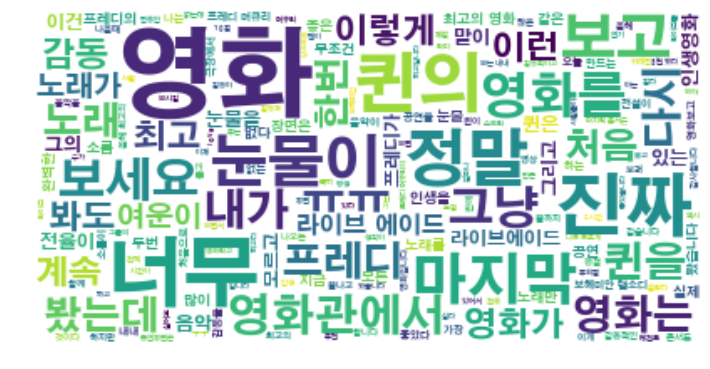

In [254]:
plt.figure(figsize=(12,12))
plt.imshow(wdcloud, interpolation='bilinear') # 선명도를 높게
plt.axis('off') #가로세로 축 사라짐
plt.show(wdcloud)